In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import cv2

In [2]:
df = pd.read_csv('../input/fer2013/fer2013.csv')
df.head()

,emotion,pixels,Usage
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training
1,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training
2,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training


In [3]:
len(df.iloc[0]['pixels'].split())

2304

In [4]:
label_map = ['Anger', 'Neutral', 'Fear', 'Happy', 'Sad', 'Surprise']
import matplotlib.pyplot as plt
img = df.iloc[0]['pixels'].split()
img = [int(i) for i in img]
img = np.array(img)
img = img.reshape(48,48)
img.shape

(48, 48)

Text(0.5, 0, '0')

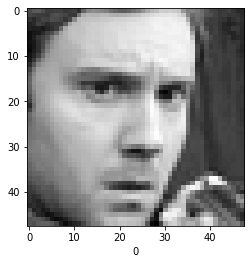

In [5]:
plt.imshow(img, cmap='gray')
plt.xlabel(df.iloc[0]['emotion'])

In [6]:
X = []
y = []

In [7]:
def getData(path):
    anger = 0
    fear = 0
    sad = 0
    happy = 0
    surprise = 0
    neutral = 0
    df = pd.read_csv(path)
    
    X = []
    y = []    
    
    for i in range(len(df)):
        if df.iloc[i]['emotion'] != 1:
            if df.iloc[i]['emotion'] == 0:
                if anger <= 4000:            
                    y.append(df.iloc[i]['emotion'])
                    im = df.iloc[i]['pixels']
                    im = [int(x) for x in im.split()]
                    X.append(im)
                    anger += 1
                else:
                    pass
                
            if df.iloc[i]['emotion'] == 2:
                if fear <= 4000:            
                    y.append(df.iloc[i]['emotion'])
                    im = df.iloc[i]['pixels']
                    im = [int(x) for x in im.split()]
                    X.append(im)
                    fear += 1
                else:
                    pass
                
            if df.iloc[i]['emotion'] == 3:
                if happy <= 4000:            
                    y.append(df.iloc[i]['emotion'])
                    im = df.iloc[i]['pixels']
                    im = [int(x) for x in im.split()]
                    X.append(im)
                    happy += 1
                else:
                    pass
                
            if df.iloc[i]['emotion'] == 4:
                if sad <= 4000:            
                    y.append(df.iloc[i]['emotion'])
                    im = df.iloc[i]['pixels']
                    im = [int(x) for x in im.split()]
                    X.append(im)
                    sad += 1
                else:
                    pass
                
            if df.iloc[i]['emotion'] == 5:
                if surprise <= 4000:            
                    y.append(df.iloc[i]['emotion'])
                    im = df.iloc[i]['pixels']
                    im = [int(x) for x in im.split()]
                    X.append(im)
                    surprise += 1
                else:
                    pass
                
            if df.iloc[i]['emotion'] == 6:
                if neutral <= 4000:            
                    y.append(df.iloc[i]['emotion'])
                    im = df.iloc[i]['pixels']
                    im = [int(x) for x in im.split()]
                    X.append(im)
                    neutral += 1
                else:
                    pass

            
            
    return X, y  

In [8]:
X, y = getData('../input/fer2013/fer2013.csv')

In [9]:
np.unique(y, return_counts=True)

(array([0, 2, 3, 4, 5, 6]), array([4001, 4001, 4001, 4001, 4001, 4001]))

In [10]:
X = np.array(X)/255.0
y = np.array(y)
X.shape, y.shape

((24006, 2304), (24006,))

In [11]:
y_o = []
for i in y:
    if i != 6:
        y_o.append(i)
        
    else:
        y_o.append(1)

In [12]:
np.unique(y_o, return_counts=True)

(array([0, 1, 2, 3, 4, 5]), array([4001, 4001, 4001, 4001, 4001, 4001]))

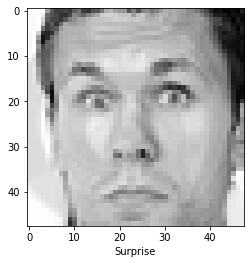

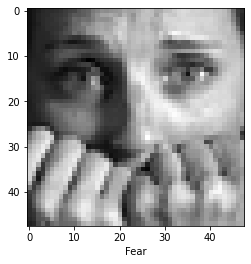

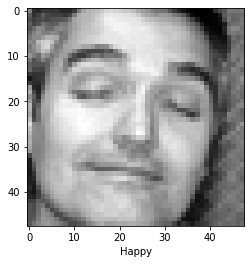

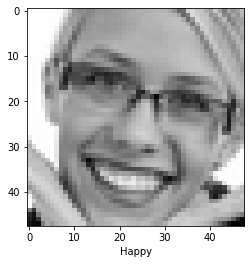

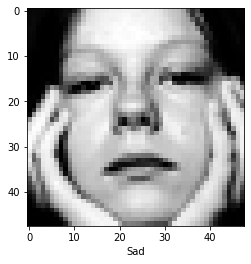

In [13]:
for i in range(5):
    r = np.random.randint((1), 24000, 1)[0]
    plt.figure()
    plt.imshow(X[r].reshape(48,48), cmap='gray')
    plt.xlabel(label_map[y_o[r]])

In [14]:
X = X.reshape(len(X), 48, 48, 1)
X.shape

(24006, 48, 48, 1)

In [15]:
from tensorflow.keras.utils import to_categorical
y_new = to_categorical(y_o, num_classes=6)
len(y_o), y_new.shape

(24006, (24006, 6))

In [16]:
y_o[150], y_new[150]

(0, array([1., 0., 0., 0., 0., 0.], dtype=float32))

In [17]:
from keras.models import Sequential
from keras.layers import Dense , Activation , Dropout ,Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.metrics import categorical_accuracy
from keras.models import model_from_json
from keras.callbacks import ModelCheckpoint
from keras.optimizers import *
from tensorflow.keras.layers import BatchNormalization

In [18]:
model = Sequential()


input_shape = (48,48,1)


model.add(Conv2D(64, (5, 5), input_shape=input_shape,activation='relu', padding='same'))
model.add(Conv2D(64, (5, 5), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Conv2D(128, (5, 5),activation='relu',padding='same'))
model.add(Conv2D(128, (5, 5),padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(256, (3, 3),activation='relu',padding='same'))
model.add(Conv2D(256, (3, 3),activation='relu',padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

## (15, 15) --->  30
model.add(Flatten())
model.add(Dense(6, activation='softmax'))

model.compile(loss='categorical_crossentropy', metrics=['accuracy'],optimizer='adam')

2022-01-05 08:21:49.321499: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-01-05 08:21:49.417470: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-01-05 08:21:49.418166: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-01-05 08:21:49.419827: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

In [19]:
model.fit(X, y_new, epochs=22, batch_size=64, shuffle=True, validation_split=0.2)

2022-01-05 08:21:52.156192: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/22


2022-01-05 08:21:53.575622: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


301/301 [==============================] - 14s 24ms/step - loss: 2.1152 - accuracy: 0.2562 - val_loss: 3.2218 - val_accuracy: 0.1093
Epoch 2/22
301/301 [==============================] - 7s 23ms/step - loss: 1.6821 - accuracy: 0.3442 - val_loss: 1.8790 - val_accuracy: 0.2915
Epoch 3/22
301/301 [==============================] - 7s 22ms/step - loss: 1.5134 - accuracy: 0.4085 - val_loss: 2.2596 - val_accuracy: 0.2010
Epoch 4/22
301/301 [==============================] - 7s 22ms/step - loss: 1.3803 - accuracy: 0.4652 - val_loss: 1.4904 - val_accuracy: 0.4071
Epoch 5/22
301/301 [==============================] - 7s 22ms/step - loss: 1.3138 - accuracy: 0.4873 - val_loss: 1.2806 - val_accuracy: 0.4919
Epoch 6/22
301/301 [==============================] - 7s 22ms/step - loss: 1.2325 - accuracy: 0.5203 - val_loss: 1.6012 - val_accuracy: 0.4075
Epoch 7/22
301/301 [==============================] - 7s 23ms/step - loss: 1.1644 - accuracy: 0.5534 - val_loss: 1.7505 - val_accuracy: 0.3476
Epoch 8/2

In [20]:
pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


In [21]:
model.save('model.h5')
import cv2
path='../input/test-happy-image/my_image.jpg'
test_img = cv2.imread(path)


In [22]:
test_img.shape

(184, 274, 3)

In [23]:

test_img = np.reshape(test_img, -1)

In [24]:
test_img = cv2.resize(test_img, (48,48))
test_img.shape

(48, 48)

In [25]:
test_img = test_img.reshape(1,48,48,1)

In [26]:
model.predict(test_img)

array([[0., 1., 0., 0., 0., 0.]], dtype=float32)